<a href="https://colab.research.google.com/github/fengwewn/rov-test/blob/master/Preprocess_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocess the image

In [ ]:
# Import all required libraries
import cv2 # Opencv
from google.colab.patches import cv2_imshow as cv2_imshow # Substitution in google colab
import numpy as np # Linear Algebra
from ipywidgets import interact, interactive, fixed, interact_manual


1.Read the image needed

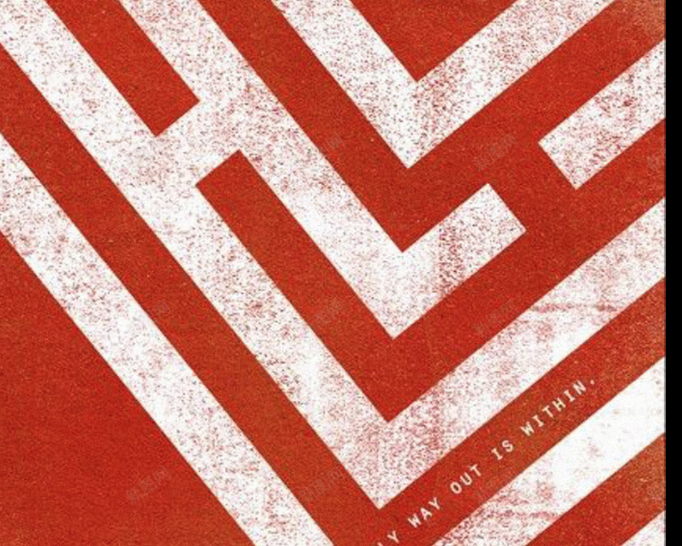

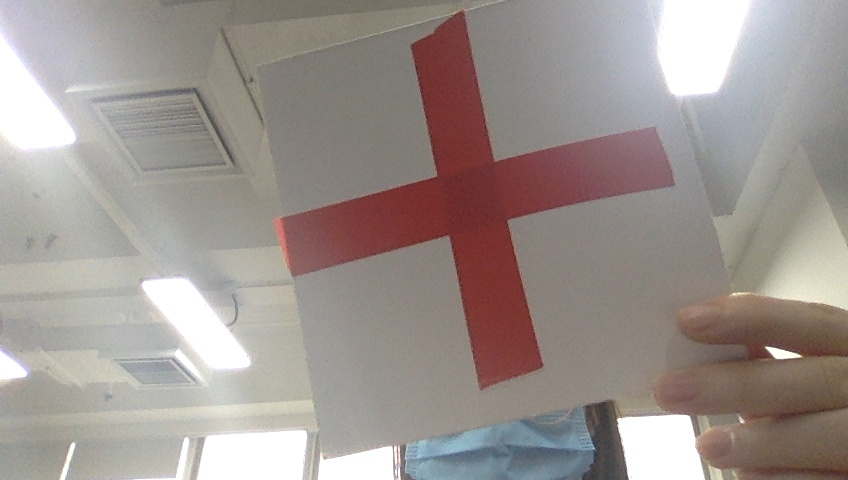

In [ ]:
path1= 'red_line.png'
frame1 = cv2.imread(path)
path2 = 'red_line.jpeg'
frame2 = cv2.imread(path2)
cv2_imshow(frame1)
cv2_imshow(frame2)

2.Color_filtering

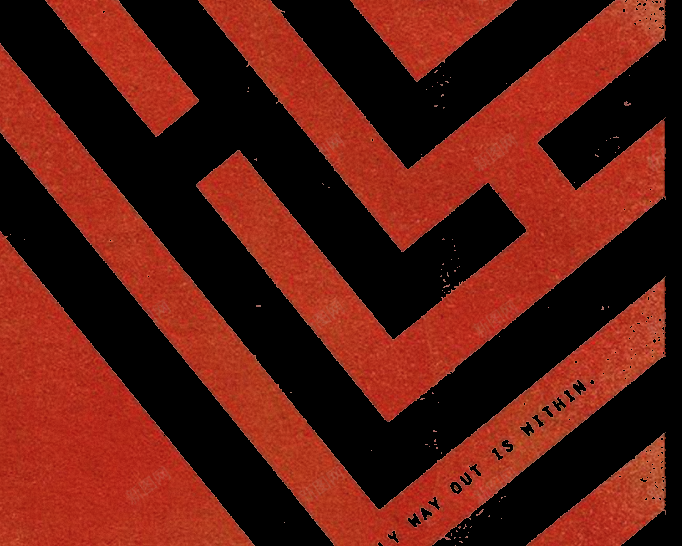

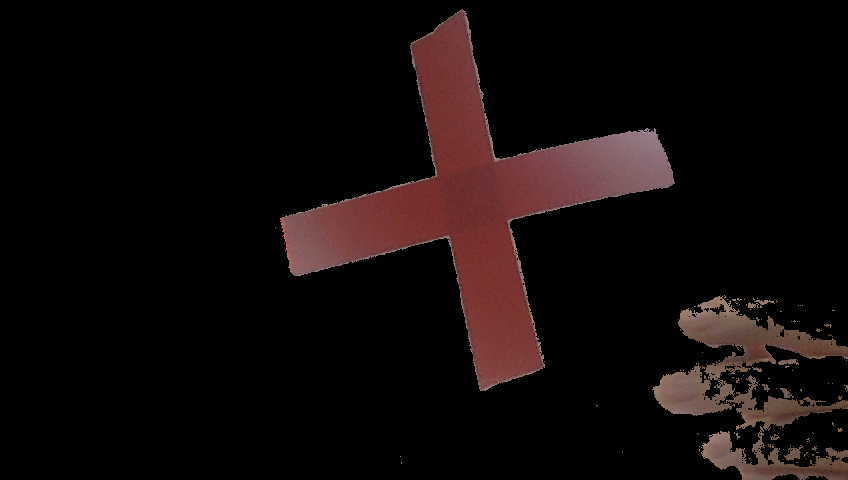

In [ ]:
lab1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2LAB)
Min = np.array([70, 134, 139])    # for red_line.png
Max = np.array([144, 221, 196])
mask = cv2.inRange(lab1, Min, Max)
resultLAB1 = cv2.bitwise_and(frame1, frame1, mask = mask)
cv2_imshow(resultLAB1)

lab2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2LAB)
Min = np.array([41, 135, 104])    # for red_line.jpeg
Max = np.array([143, 169, 184])
mask = cv2.inRange(lab2, Min, Max)
resultLAB2 = cv2.bitwise_and(frame2, frame2, mask = mask)
cv2_imshow(resultLAB2)

3.Grayscale or Thresholding

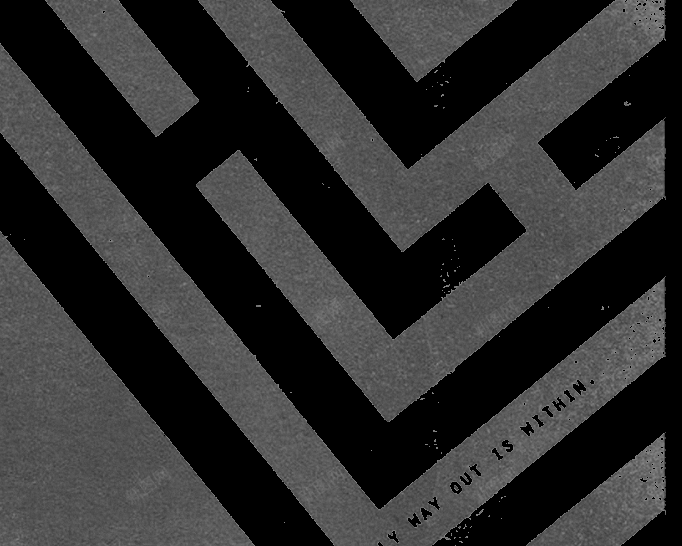

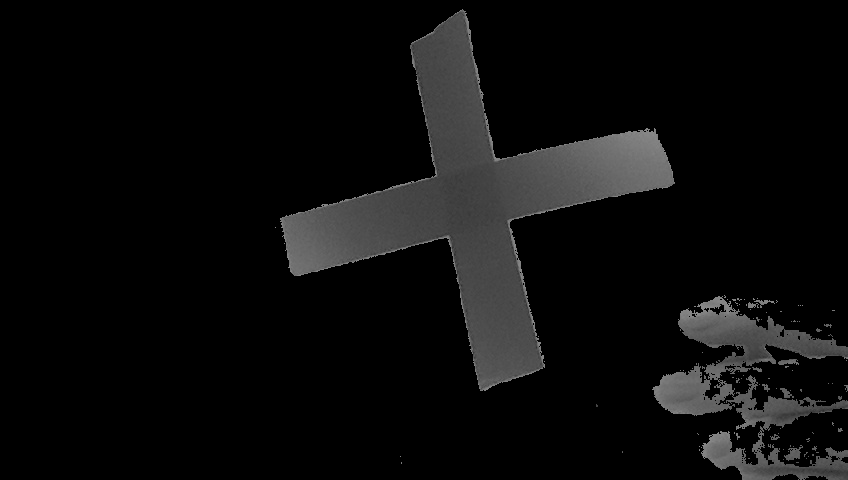

In [ ]:
gray_image1 = cv2.cvtColor(resultLAB1,cv2.COLOR_BGR2GRAY)

gray_image2 = cv2.cvtColor(resultLAB2,cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image1)
cv2_imshow(gray_image2)

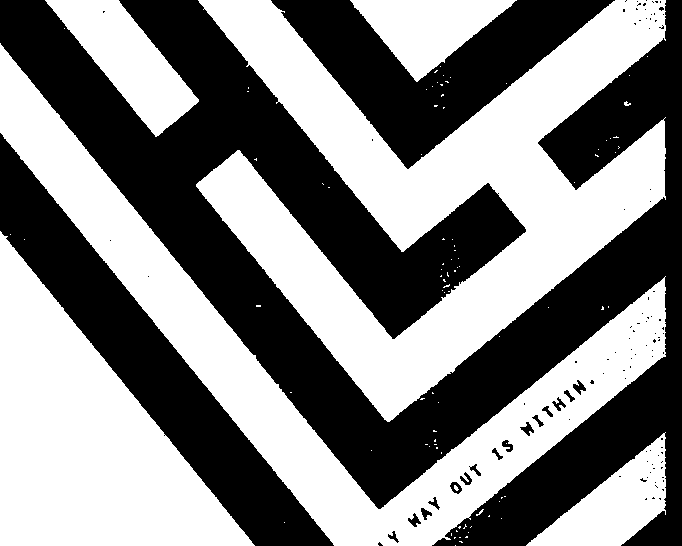

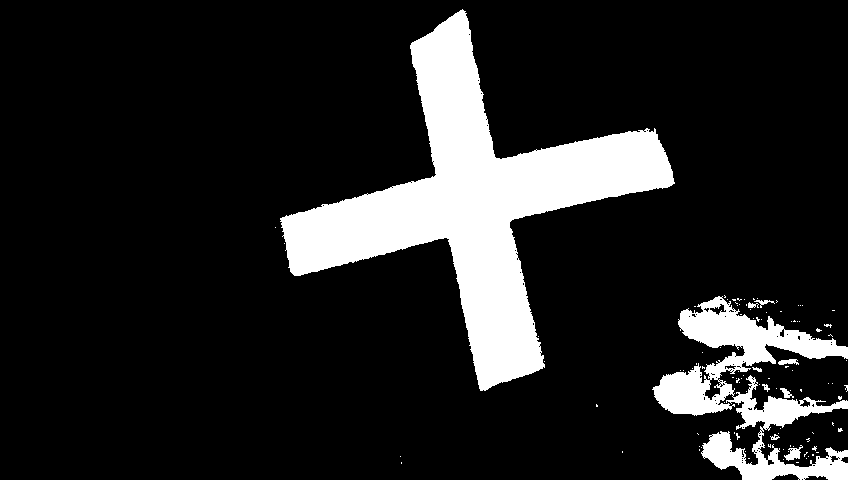

In [ ]:
thresh = 0
maxValue = 255  # only black and white
processed_frame, thresholding_image1 = cv2.threshold(gray_image1, thresh, maxValue, cv2.THRESH_BINARY)
processed_frame, thresholding_image2 = cv2.threshold(gray_image2, thresh, maxValue, cv2.THRESH_BINARY)
cv2_imshow(thresholding_image1)
cv2_imshow(thresholding_image2)


4.Blur and Canny

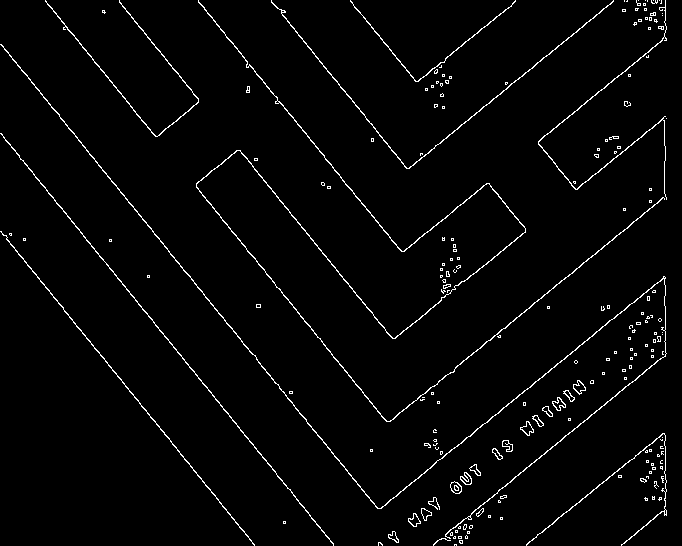

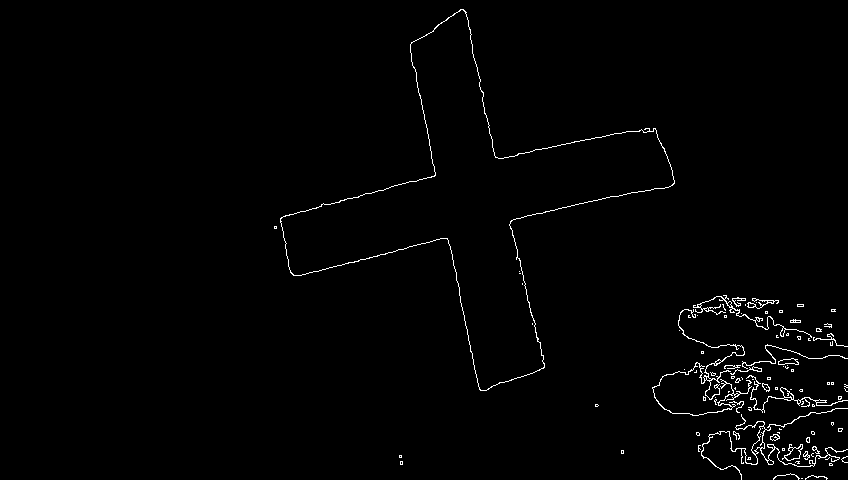

In [ ]:
blur_image1 = cv2.GaussianBlur(thresholding_image1, (3,3), 0)    
edges1 = cv2.Canny(image=blur_image1, threshold1=100, threshold2=200) 

blur_image2 = cv2.GaussianBlur(thresholding_image2, (3,3), 0)    
edges2 = cv2.Canny(image=blur_image2, threshold1=100, threshold2=200) 

cv2_imshow(edges1)
cv2_imshow(edges2)

5.Houghline ( Standard or Pro )

[[[  27.           2.4609141]]

 [[ -35.           2.4609141]]

 [[  83.           2.4609141]]

 [[ 145.           2.4609141]]

 [[ -92.           2.4609141]]

 [[-153.           2.4609141]]

 [[ 633.           0.8901179]]

 [[ 387.           0.8901179]]

 [[ 448.           0.8901179]]

 [[ 572.           0.8901179]]

 [[-210.           2.4609141]]]
[(-650, -760, 608, 794, 1.2352941176470589, 0, 27.0, 2.4609141), (-602, -799, 656, 755, 1.2352941176470589, 0, -35.0, 2.4609141), (-693, -724, 564, 829, 1.2354813046937152, 0, 83.0, 2.4609141), (-742, -685, 516, 868, 1.2344992050874404, 0, 145.0, 2.4609141), (-557, -835, 700, 719, 1.2362768496420047, 0, -92.0, 2.4609141), (-510, -873, 748, 680, 1.2344992050874404, 0, -153.0, 2.4609141), (-378, 1121, 1175, -137, -0.8100450740502254, 0, 633.0, 0.8901179), (-533, 930, 1020, -328, -0.8100450740502254, 0, 387.0, 0.8901179), (-495, 977, 1059, -281, -0.8095238095238095, 0, 448.0, 0.8901179), (-417, 1073, 1137, -184, -0.8088803088803089, 0, 572.0, 

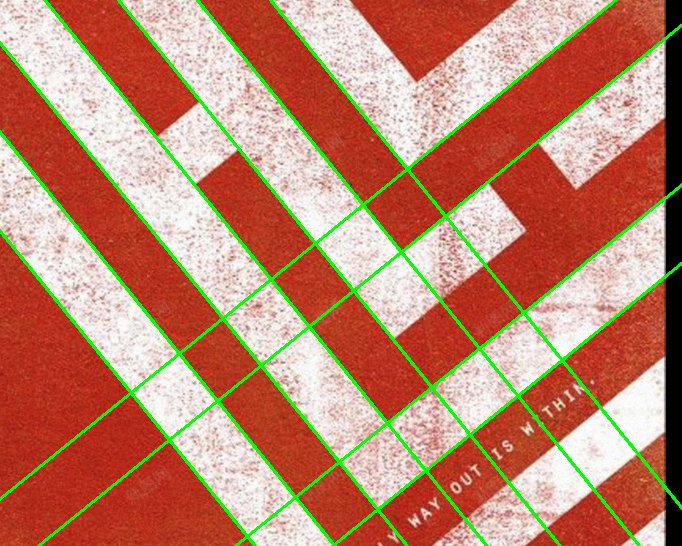

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 10), (1, 2), (1, 3), (1, 4), (1, 5), (1, 10), (2, 3), (2, 4), (2, 5), (2, 10), (3, 4), (3, 5), (3, 10), (4, 5), (4, 10), (5, 10), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


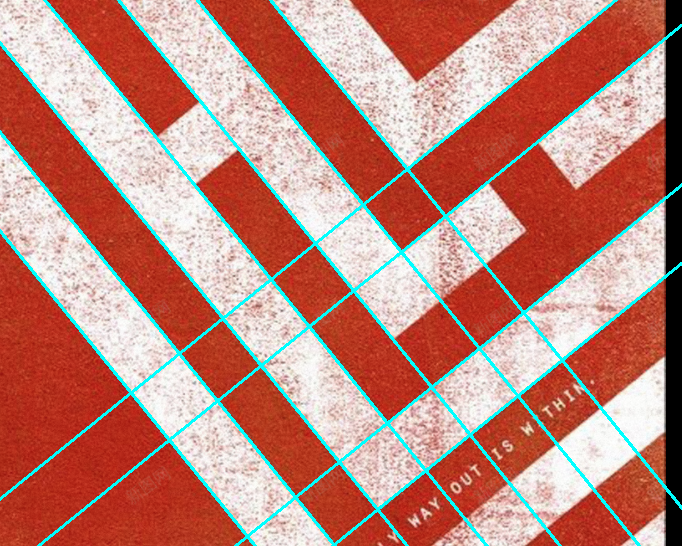

In [ ]:
line_data = []
parallel = []
linesS = cv2.HoughLines(edges1,rho=1,theta=np.pi/180,threshold=200)
print(linesS)

for line in linesS : 
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000 *(-b))
    y1 = int(y0 + 1000 *a)
    x2 = int(x0 - 1000 *(-b))
    y2 = int(y0 - 1000 *a)
    if (x2 - x1) != 0 :
        slope = (y2-y1) / (x2-x1)
        i_code = 0
    else :
        slope = 0
        i_code = 1
        
    line_data.extend([(x1,y1,x2,y2,slope,i_code,rho,theta)])
    cv2.line(frame1,(x1,y1),(x2,y2),(0,255,0),2)

print(line_data)
cv2_imshow(frame1)

for i in range(len(line_data)):
    for j in range(i+1, len(line_data)):
        if (abs(line_data[i][4] - line_data[j][4]) < 0.1) and (line_data[i][5]!=1):
            cv2.line(frame1,(line_data[i][0],line_data[i][1]),(line_data[i][2],line_data[i][3]),(255,255,0),2)
            cv2.line(frame1,(line_data[j][0],line_data[j][1]),(line_data[j][2],line_data[j][3]),(255,255,0),2)
            parallel.extend([(i,j)])
        elif(line_data[i][5] == 1):
            print('The line is Vertical')
          
print(parallel)
cv2_imshow(frame1)

[[[281 217 388 188]]

 [[450 246 475 373]]

 [[300 275 440 238]]

 [[524 153 628 131]]

 [[510 221 543 367]]

 [[743 362 844 357]]

 [[712 347 757 459]]

 [[724 345 799 466]]

 [[704 366 818 476]]

 [[684 309 795 322]]

 [[515 242 544 367]]

 [[732 345 836 460]]

 [[738 345 773 478]]

 [[730 448 845 450]]

 [[697 362 839 408]]

 [[694 366 798 478]]

 [[711 364 826 479]]

 [[739 345 788 474]]

 [[731 450 843 457]]

 [[341 265 444 238]]

 [[715 466 827 323]]

 [[706 301 847 346]]

 [[702 302 818 338]]

 [[285 215 390 187]]]
[(281, 217, 388, 188, -0.27102803738317754, 0), (450, 246, 475, 373, 5.08, 0), (300, 275, 440, 238, -0.2642857142857143, 0), (524, 153, 628, 131, -0.21153846153846154, 0), (510, 221, 543, 367, 4.424242424242424, 0), (743, 362, 844, 357, -0.04950495049504951, 0), (712, 347, 757, 459, 2.488888888888889, 0), (724, 345, 799, 466, 1.6133333333333333, 0), (704, 366, 818, 476, 0.9649122807017544, 0), (684, 309, 795, 322, 0.11711711711711711, 0), (515, 242, 544, 367, 4.310344

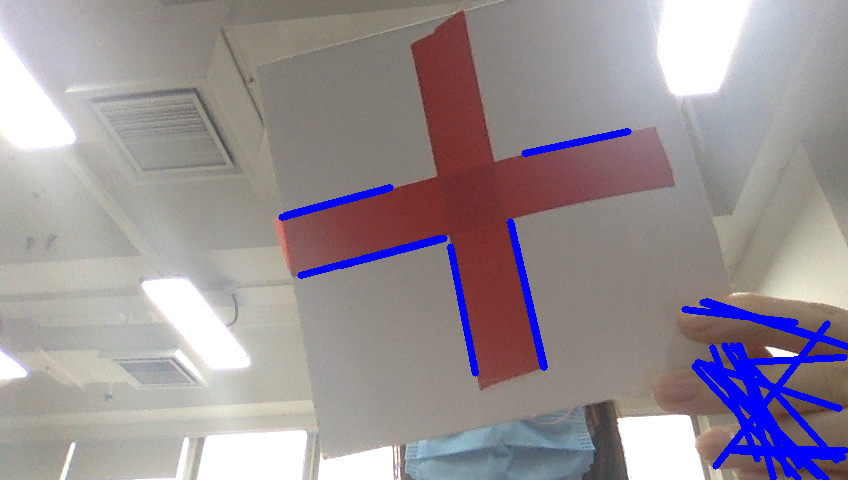

[(0, 2), (0, 3), (0, 19), (0, 23), (2, 3), (2, 19), (2, 23), (3, 19), (3, 23), (5, 13), (8, 16), (9, 13), (9, 18), (11, 15), (13, 18), (14, 21), (14, 22), (15, 16), (19, 23), (21, 22)]


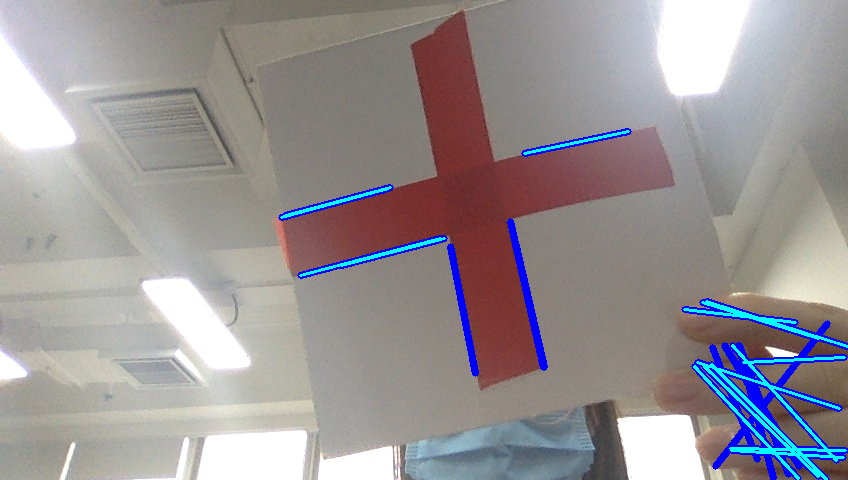

In [ ]:
line_data = []
parallel = []

linesP = cv2.HoughLinesP(edges2, rho=1, theta=np.pi/180, threshold=15, minLineLength=100, maxLineGap=20)
print(linesP)

for line in linesP:
  for x1,y1,x2,y2 in line:
    if (x2-x1) != 0:
      slope = (y2-y1) / (x2-x1)
      i_code = 0
    else :
      slope = 0
      i_code = 1 
    line_data.extend([(x1,y1,x2,y2,slope,i_code)])   
    cv2.line(frame2,(x1,y1),(x2,y2),(255,0,0),5)

print(line_data)
cv2_imshow(frame2)

for i in range(len(line_data)):
    for j in range(i+1, len(line_data)):
        if (abs(line_data[i][4] - line_data[j][4]) < 0.1) and (line_data[i][5]!=1):
            cv2.line(frame2,(line_data[i][0],line_data[i][1]),(line_data[i][2],line_data[i][3]),(255,255,0),2)
            cv2.line(frame2,(line_data[j][0],line_data[j][1]),(line_data[j][2],line_data[j][3]),(255,255,0),2)
            parallel.extend([(i,j)])
        elif(line_data[i][5] == 1):
            print('The line is Vertical')
          
print(parallel)
cv2_imshow(frame2)